In [12]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import pygmt
import xarray as xr
import rioxarray

Source of the magnetic global grid: https://www.ncei.noaa.gov/products/earth-magnetic-model-anomaly-grid-2

EMAG2v3 Source GeoTIFFs

In [2]:
da = rioxarray.open_rasterio("/home/santi/downloads/EMAG2_V3_UpCont_DataTiff.tif")
da

<xarray.DataArray (band: 1, y: 5399, x: 10800)>
[58309200 values with dtype=float32]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 0.0 0.03333 0.06667 0.1 ... 359.9 359.9 359.9 360.0
  * y            (y) float64 89.97 89.93 89.9 89.87 ... -89.9 -89.93 -89.97
    spatial_ref  int64 0
Attributes:
    _FillValue:    -3.4028235e+38
    scale_factor:  1.0
    add_offset:    0.0

In [3]:
da = da.sel(band=1).drop("band").drop("spatial_ref")
da

<xarray.DataArray (y: 5399, x: 10800)>
[58309200 values with dtype=float32]
Coordinates:
  * x        (x) float64 0.0 0.03333 0.06667 0.1 ... 359.9 359.9 359.9 360.0
  * y        (y) float64 89.97 89.93 89.9 89.87 ... -89.87 -89.9 -89.93 -89.97
Attributes:
    _FillValue:    -3.4028235e+38
    scale_factor:  1.0
    add_offset:    0.0

In [4]:
da.values[da.values < -3e28] = np.nan
da

<xarray.DataArray (y: 5399, x: 10800)>
array([[ -99.178406,  -99.173134,  -99.167854, ...,  -99.19581 ,  -99.1899  ,
         -99.184006],
       [ -97.34229 ,  -97.325645,  -97.309006, ...,  -97.39105 ,  -97.37488 ,
         -97.3587  ],
       [ -96.164795,  -96.13412 ,  -96.10345 , ...,  -96.24937 ,  -96.22168 ,
         -96.193985],
       ...,
       [ -34.207455,  -34.301018,  -34.531914, ...,  -34.511127,  -34.288982,
         -34.203697],
       [ -97.63399 ,  -97.78419 ,  -98.031525, ...,  -98.01078 ,  -97.77203 ,
         -99.45509 ],
       [-101.30384 , -101.44309 , -101.68868 , ..., -101.49767 , -101.31349 ,
         -98.1574  ]], dtype=float32)
Coordinates:
  * x        (x) float64 0.0 0.03333 0.06667 0.1 ... 359.9 359.9 359.9 360.0
  * y        (y) float64 89.97 89.93 89.9 89.87 ... -89.87 -89.9 -89.93 -89.97
Attributes:
    _FillValue:    -3.4028235e+38
    scale_factor:  1.0
    add_offset:    0.0

In [5]:
da = da.rename(x="longitude", y="latitude")
da

<xarray.DataArray (latitude: 5399, longitude: 10800)>
array([[ -99.178406,  -99.173134,  -99.167854, ...,  -99.19581 ,  -99.1899  ,
         -99.184006],
       [ -97.34229 ,  -97.325645,  -97.309006, ...,  -97.39105 ,  -97.37488 ,
         -97.3587  ],
       [ -96.164795,  -96.13412 ,  -96.10345 , ...,  -96.24937 ,  -96.22168 ,
         -96.193985],
       ...,
       [ -34.207455,  -34.301018,  -34.531914, ...,  -34.511127,  -34.288982,
         -34.203697],
       [ -97.63399 ,  -97.78419 ,  -98.031525, ...,  -98.01078 ,  -97.77203 ,
         -99.45509 ],
       [-101.30384 , -101.44309 , -101.68868 , ..., -101.49767 , -101.31349 ,
         -98.1574  ]], dtype=float32)
Coordinates:
  * longitude  (longitude) float64 0.0 0.03333 0.06667 0.1 ... 359.9 359.9 360.0
  * latitude   (latitude) float64 89.97 89.93 89.9 89.87 ... -89.9 -89.93 -89.97
Attributes:
    _FillValue:    -3.4028235e+38
    scale_factor:  1.0
    add_offset:    0.0

In [6]:
downsample_factor = 4
da = da.sel(
    longitude=slice(None, None, downsample_factor),
    latitude=slice(None, None, downsample_factor)
)
da

<xarray.DataArray (latitude: 1350, longitude: 2700)>
array([[-99.178406, -99.1573  , -99.1362  , ..., -99.24888 , -99.22528 ,
        -99.2017  ],
       [-94.359566, -94.19722 , -94.03495 , ..., -94.759094, -94.627144,
        -94.49527 ],
       [-90.07583 , -89.80474 , -89.533806, ..., -90.739624, -90.52039 ,
        -90.301346],
       ...,
       [-66.69842 , -65.286156, -67.73091 , ..., -86.63556 , -64.753975,
        -65.48987 ],
       [-49.445766, -49.896606, -50.10876 , ..., -79.2625  , -50.05035 ,
        -49.741955],
       [-34.207455, -35.07814 , -44.76409 , ..., -70.8843  , -35.632275,
        -34.775425]], dtype=float32)
Coordinates:
  * longitude  (longitude) float64 0.0 0.1333 0.2667 0.4 ... 359.6 359.7 359.9
  * latitude   (latitude) float64 89.97 89.83 89.7 89.57 ... -89.63 -89.77 -89.9
Attributes:
    _FillValue:    -3.4028235e+38
    scale_factor:  1.0
    add_offset:    0.0

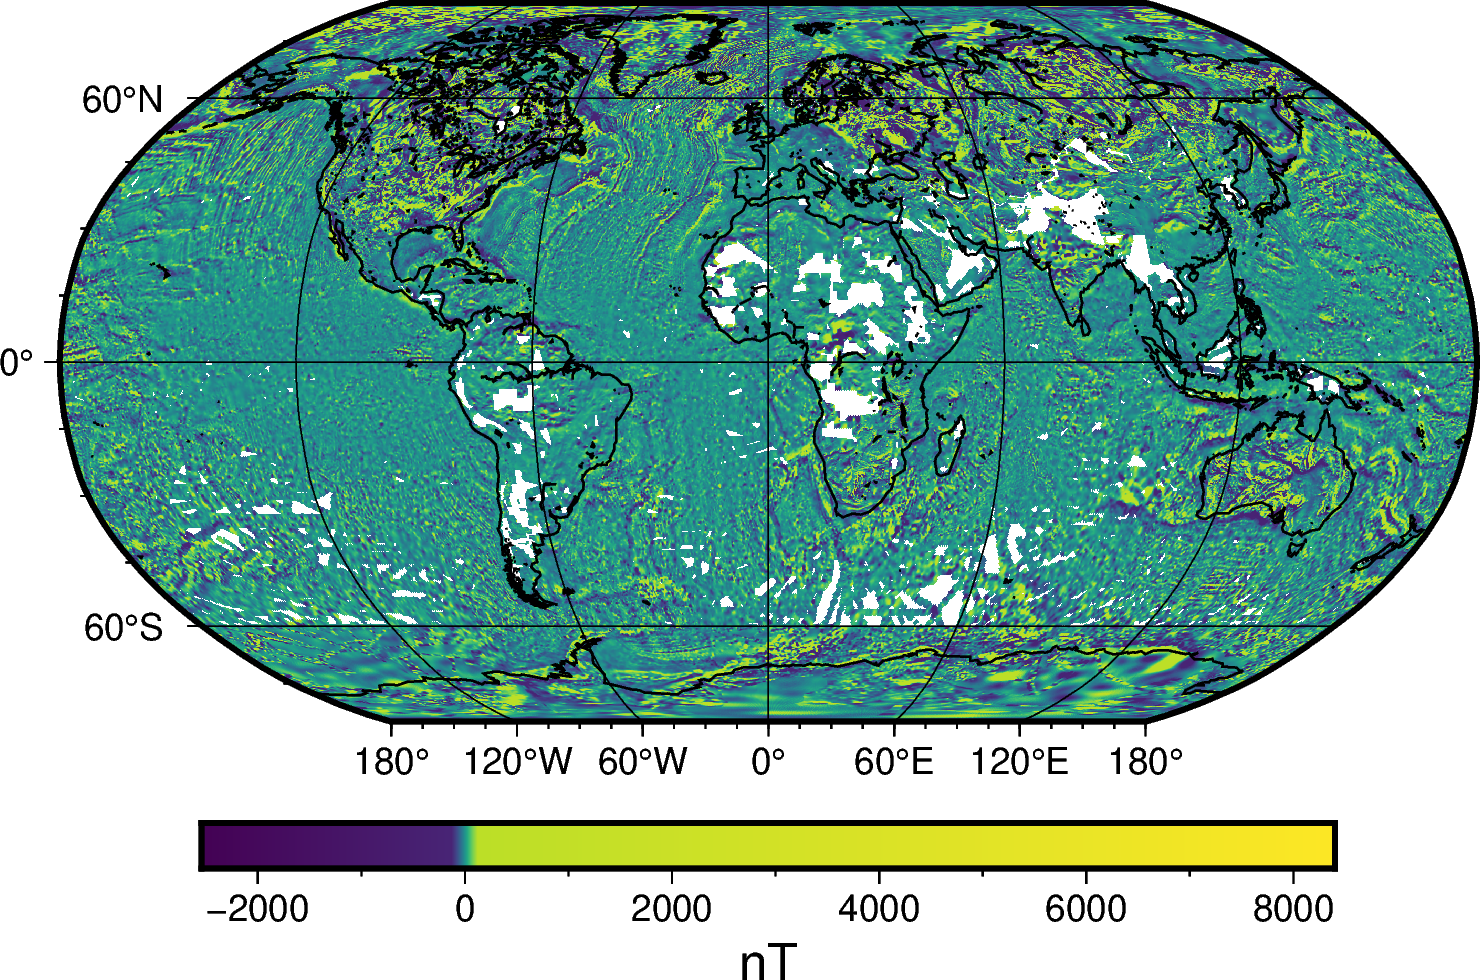

In [7]:
# Make a plot of data using PyGMT
gmt_projection = "N12c"
fig = pygmt.Figure()

pygmt.grd2cpt(grid=da, cmap="viridis", continuous=True)

with pygmt.config(FONT_TITLE="14p"):
    fig.grdimage(
        da,
        region="d",
        projection=gmt_projection,
        frame="afg",
        # shading="+a45+n70",
        cmap=True,
        nan_transparent=True,
    )

fig.coast(shorelines="0.5p,black", resolution="crude")

fig.colorbar(cmap=True, frame=["af", "x+lnT"])

fig.show()

In [17]:
data_dir = Path("..") / "data"
fname = data_dir / "magnetic-anomaly.nc"
da.to_netcdf(fname, engine="netcdf4")

In [18]:
da_read = xr.load_dataarray(fname)
da_read

<xarray.DataArray (latitude: 1350, longitude: 2700)>
array([[-99.178406, -99.1573  , -99.1362  , ..., -99.24888 , -99.22528 ,
        -99.2017  ],
       [-94.359566, -94.19722 , -94.03495 , ..., -94.759094, -94.627144,
        -94.49527 ],
       [-90.07583 , -89.80474 , -89.533806, ..., -90.739624, -90.52039 ,
        -90.301346],
       ...,
       [-66.69842 , -65.286156, -67.73091 , ..., -86.63556 , -64.753975,
        -65.48987 ],
       [-49.445766, -49.896606, -50.10876 , ..., -79.2625  , -50.05035 ,
        -49.741955],
       [-34.207455, -35.07814 , -44.76409 , ..., -70.8843  , -35.632275,
        -34.775425]], dtype=float32)
Coordinates:
  * longitude  (longitude) float64 0.0 0.1333 0.2667 0.4 ... 359.6 359.7 359.9
  * latitude   (latitude) float64 89.97 89.83 89.7 89.57 ... -89.63 -89.77 -89.9
Attributes:
    grid_mapping:  spatial_ref

In [ ]:
# Make a plot of data using PyGMT
gmt_projection = "N12c"
fig = pygmt.Figure()

pygmt.grd2cpt(grid=da_read, cmap="viridis", continuous=True)

with pygmt.config(FONT_TITLE="14p"):
    fig.grdimage(
        da_read,
        region="d",
        projection=gmt_projection,
        frame="afg",
        # shading="+a45+n70",
        cmap=True,
        nan_transparent=True,
    )

fig.coast(shorelines="0.5p,black", resolution="crude")

fig.colorbar(cmap=True, frame=["af", "x+lnT"])

fig.show()

grdinfo [WARNING]: Guessing of registration in conflict between x and y, using gridline
